In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
import time
import urllib.request

Descargamos un conjunto de datos de Kaggle:

In [4]:
api_token = {"username":"juliahernndezquintas","key":"a36e1c000b9dfca556f670ebce90a9f5"}

!rm -rf /root/.kaggle.
!mkdir /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

# Descargamos nuestra base de datos:
!kaggle datasets download -d dhruvildave/english-handwritten-characters-dataset

mkdir: cannot create directory ‘/root/.kaggle’: File exists
english-handwritten-characters-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import zipfile
archivo_zip="/content/english-handwritten-characters-dataset.zip"

 Descomprimimos el archivo ZIP:

In [6]:
archivo_zip ='/content/english-handwritten-characters-dataset.zip'
extract_to_path='/content/basededatos'

with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
  zip_ref.extractall(extract_to_path)


Abrimos el archivo `english.csv` y lo cargamos `df`. Imprimimos los seis primeros registros para ver qué aspecto tienen.

In [7]:
import glob
import pandas as pd

# Después de descomprimir los archivos como has mostrado anteriormente...

# Lista de rutas de imagen extraídas
imgs = glob.glob('/content/basededatos/Img/*')  # Asegúrate de que la ruta sea correcta

# Cargando archivo CSV extraído
df = pd.read_csv("/content/basededatos/english.csv")  # Asegúrate de que la ruta sea correcta
print(df.head(6))



                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0
5  Img/img001-006.png     0


Se lee cada imagen en RGB y se establece un tamaño = 64x64 para que todas las imágenes sean iguales. Después se pasa cada imagen y cada etiqueta a formato matriz de numpy para trabajar más fácilmente con ésta. Se transforman las etiquetas a valores numéricos.
Se crea un conjunto de datos de entrenamiento y otro de test. Por último, se normalizan todos los valores de los "píxeles" de las imágenes para que todos los valores se muevan en el rango [0,1].

In [8]:
# Sorting image paths
new_imgs = sorted(imgs)

# Listing labels
labels = df['label'].tolist()
clases = np.unique(labels)

# Reading images and preprocessing
new_data = []
for i in new_imgs:
    # Read image
    img = cv2.imread(i, 1)
    # Resize image
    img = cv2.resize(img, (64, 64))
    # Append to new_data list
    new_data.append(img)
# Convert new_data to numpy array
new_data = np.array(new_data)

# Convert labels to numpy array
labels = np.array(labels)

# Encode labels
Encoder = LabelEncoder()
labels = Encoder.fit_transform(labels)

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(new_data, labels, test_size=0.2, random_state=42)

# Normalize pixel values to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

Se imprimen los conjuntos de imágenes de entrenamiento y se visualiza la primera imagen usando Matplotlib.

[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]


 [[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  ...

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]
   ...
   [1

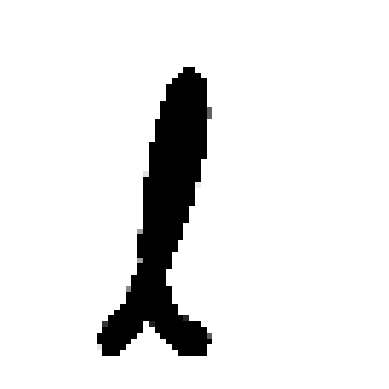

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


In [9]:
print(train_images)
import matplotlib.pyplot as plt

# Supongamos que 'train_images' es un array de imágenes con forma (num_images, height, width, channels)
# y quieres visualizar la primera imagen:

# Seleccionar una imagen
image_to_display = train_images[0]

# Visualizar la imagen
plt.imshow(image_to_display)
plt.axis('off')  # Ocultar los ejes si se desea
plt.show()

etiquetas_unicas = np.unique(test_labels)
print (etiquetas_unicas)


Se crea una red neuronal convolucional secuencial, con capas de convolución, con función de activación `relu` y con pooling máximo. En la última capa se usa la función de activación `softmax` para generar una distribución de probabilidad sebre cada clase.
Despúes se usa como función de pérdida `sparse_categorical_crossentropy` y optimizador `adam`. Usamos 20 épocas en el entrenamiento.

In [10]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)


Epoch 1/20
69/69 [==============================] - 12s 61ms/step - loss: 4.2033 - accuracy: 0.0170 - val_loss: 4.1653 - val_accuracy: 0.0092
Epoch 2/20
69/69 [==============================] - 3s 41ms/step - loss: 3.6625 - accuracy: 0.0866 - val_loss: 3.2901 - val_accuracy: 0.1355
Epoch 3/20
69/69 [==============================] - 3s 42ms/step - loss: 2.9176 - accuracy: 0.2113 - val_loss: 2.6741 - val_accuracy: 0.2619
Epoch 4/20
69/69 [==============================] - 3s 42ms/step - loss: 2.2259 - accuracy: 0.3822 - val_loss: 2.1437 - val_accuracy: 0.4212
Epoch 5/20
69/69 [==============================] - 3s 43ms/step - loss: 1.5724 - accuracy: 0.5564 - val_loss: 1.6965 - val_accuracy: 0.5458
Epoch 6/20
69/69 [==============================] - 3s 43ms/step - loss: 1.0657 - accuracy: 0.6984 - val_loss: 1.4359 - val_accuracy: 0.5769
Epoch 7/20
69/69 [==============================] - 3s 41ms/step - loss: 0.7656 - accuracy: 0.7910 - val_loss: 1.3004 - val_accuracy: 0.6392
Epoch 8/20
6

Se grafica tanto la pérdida como el acierto del modelo en los datos de entrenamiento y en los de validación para poder elegir el número de épocas adecuado.

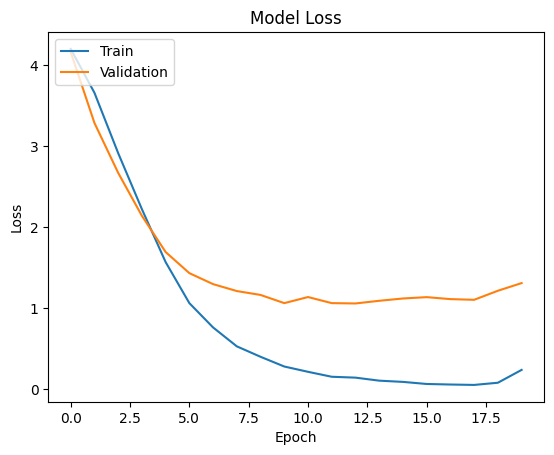

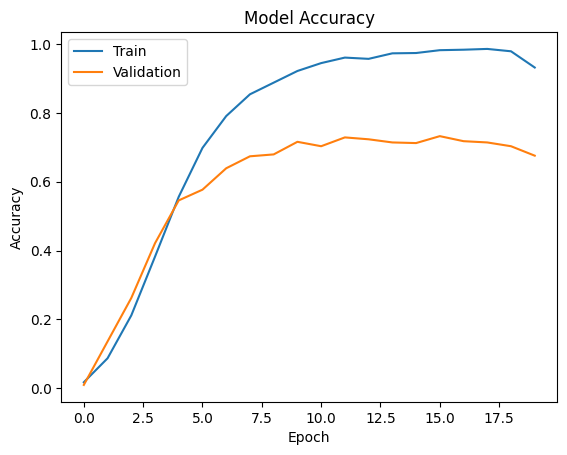

In [11]:
import matplotlib.pyplot as plt

# Gráfico de pérdida
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico de precisión
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [12]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
69/69 [==============================] - 5s 45ms/step - loss: 4.1433 - accuracy: 0.0179 - val_loss: 3.9562 - val_accuracy: 0.0348
Epoch 2/10
69/69 [==============================] - 3s 42ms/step - loss: 3.3770 - accuracy: 0.1352 - val_loss: 3.0232 - val_accuracy: 0.1703
Epoch 3/10
69/69 [==============================] - 3s 43ms/step - loss: 2.6297 - accuracy: 0.2654 - val_loss: 2.3541 - val_accuracy: 0.3535
Epoch 4/10
69/69 [==============================] - 3s 43ms/step - loss: 1.9935 - accuracy: 0.4143 - val_loss: 1.9219 - val_accuracy: 0.4432
Epoch 5/10
69/69 [==============================] - 3s 43ms/step - loss: 1.4974 - accuracy: 0.5742 - val_loss: 1.6922 - val_accuracy: 0.5037
Epoch 6/10
69/69 [==============================] - 3s 43ms/step - loss: 1.1178 - accuracy: 0.6797 - val_loss: 1.3903 - val_accuracy: 0.6117
Epoch 7/10
69/69 [==============================] - 3s 43ms/step - loss: 0.8054 - accuracy: 0.7764 - val_loss: 1.2520 - val_accuracy: 0.6026
Epoch 8/10
69

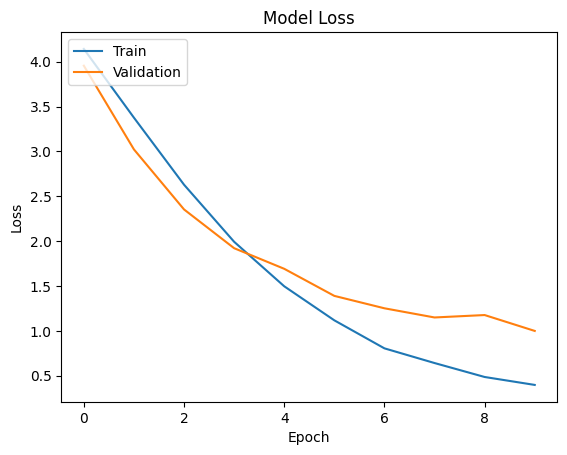

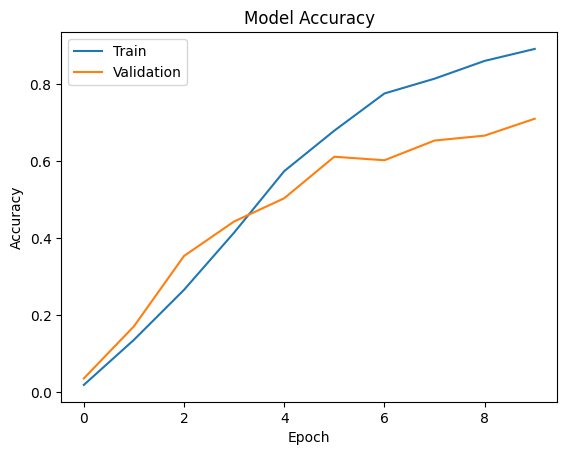

In [13]:
import matplotlib.pyplot as plt

# Gráfico de pérdida
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico de precisión
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:
# Evaluación del modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", test_loss)
print("Precisión en el conjunto de prueba:", test_accuracy)


22/22 [==============================] - 1s 31ms/step - loss: 0.9497 - accuracy: 0.7155
Pérdida en el conjunto de prueba: 0.949737548828125
Precisión en el conjunto de prueba: 0.7155424952507019


In [15]:

# Realizamos las predicciones sobre los datos de test
predicciones = model.predict(test_images)



22/22 [==============================] - 0s 10ms/step


In [16]:
# Obtenemos las etiquetas de clase de las predicciones
predicciones_etiquetas = np.argmax(predicciones, axis=1)

from sklearn.metrics import classification_report

# Mostramos las métricas de clasificación
print(classification_report(test_labels, predicciones_etiquetas))




              precision    recall  f1-score   support

           0       0.83      0.36      0.50        14
           1       0.35      0.64      0.45        11
           2       0.86      0.60      0.71        10
           3       0.93      0.65      0.76        20
           4       0.69      0.79      0.73        14
           5       0.68      0.81      0.74        16
           6       0.80      0.89      0.84         9
           7       1.00      0.93      0.97        15
           8       0.64      0.75      0.69        12
           9       0.60      0.82      0.69        11
          10       0.93      0.81      0.87        16
          11       0.78      0.78      0.78         9
          12       0.71      0.56      0.63         9
          13       0.71      1.00      0.83        10
          14       0.83      1.00      0.91        15
          15       1.00      0.79      0.88        14
          16       1.00      0.90      0.95        10
          17       0.89    


------------------------------------------------------------

--> Imagen 94


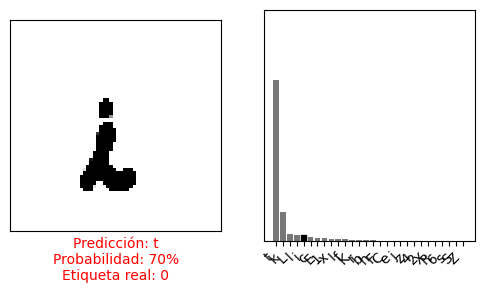







--> Imagen 38


<Figure size 640x480 with 0 Axes>

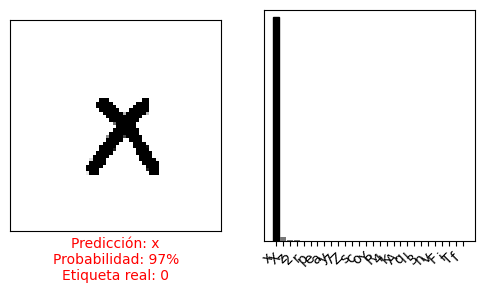







--> Imagen 73


<Figure size 640x480 with 0 Axes>

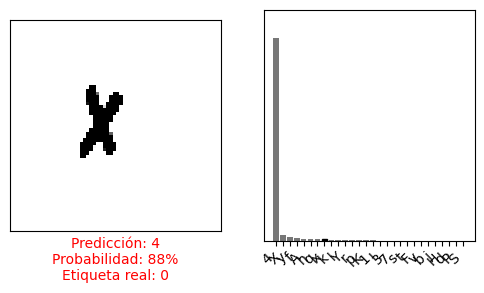







--> Imagen 62


<Figure size 640x480 with 0 Axes>

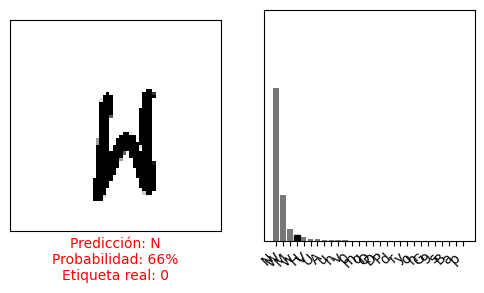







--> Imagen 7


<Figure size 640x480 with 0 Axes>

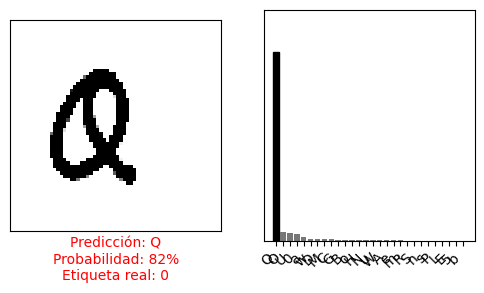







--> Imagen 53


<Figure size 640x480 with 0 Axes>

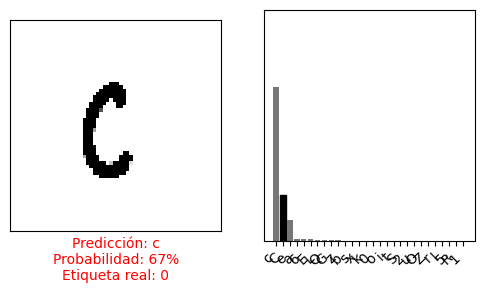







--> Imagen 67


<Figure size 640x480 with 0 Axes>

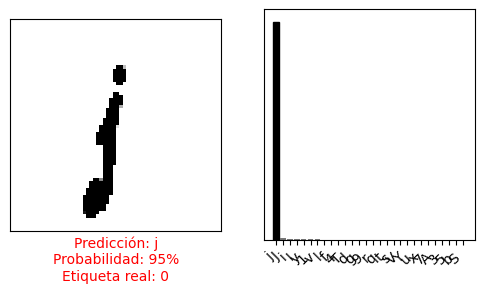







--> Imagen 58


<Figure size 640x480 with 0 Axes>

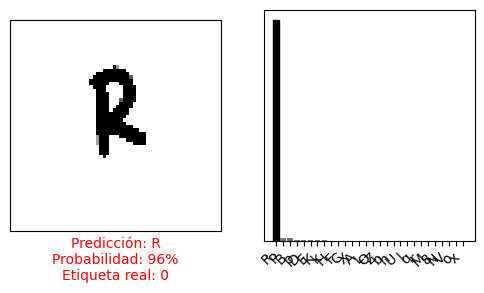







--> Imagen 2


<Figure size 640x480 with 0 Axes>

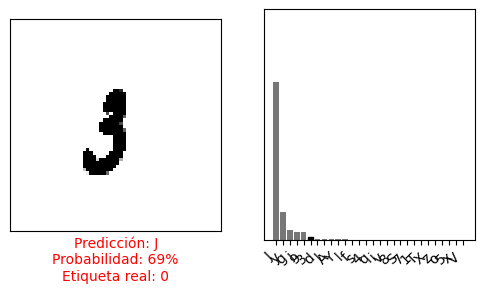







--> Imagen 32


<Figure size 640x480 with 0 Axes>

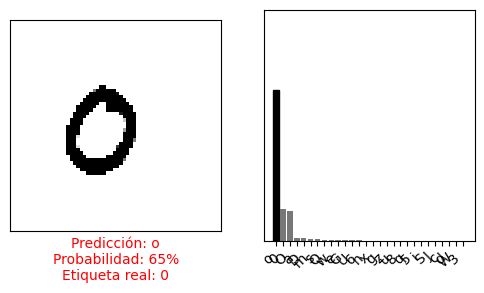

<Figure size 640x480 with 0 Axes>

In [17]:
# FUNCIONES PARA GRAFICAR PREDICCIONES
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    true_label = np.argmax(true_label)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("Predicción: {}\nProbabilidad: {:2.0f}%\nEtiqueta real: {}".format(clases[predicted_label],
                                          100 * predictions_array[predicted_label],
                                          clases[true_label]),
                                          color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    top_indices = np.argsort(predictions_array)[-28:][::-1]  # Obtén los índices de las mayores probabilidades
    class_labels = [clases[idx] for idx in top_indices]
    plt.xticks(range(28), class_labels, rotation=45, ha='right')  # Ajusta el rango y las etiquetas
    plt.yticks([])
    thisplot = plt.bar(range(28), predictions_array[top_indices], color="#777777")  # Color neutro para todas las barras
    plt.ylim([0, 1])

    # Si la etiqueta real está entre las barras mostradas, resáltala en negro
    if true_label in top_indices:
        real_label_position = np.where(top_indices == true_label)[0][0]  # Encuentra la posición de la etiqueta real
        thisplot[real_label_position].set_color('black')

random_indices = np.random.choice(100, size=10, replace=False)


print('\n' + '-'*60 + '\n')
for i in (random_indices):

  print (f"--> Imagen {i}")
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predicciones[i], test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predicciones[i],  test_labels)
  plt.show()
  plt.clf()
  print('\n''\n')
  print('\n''\n')

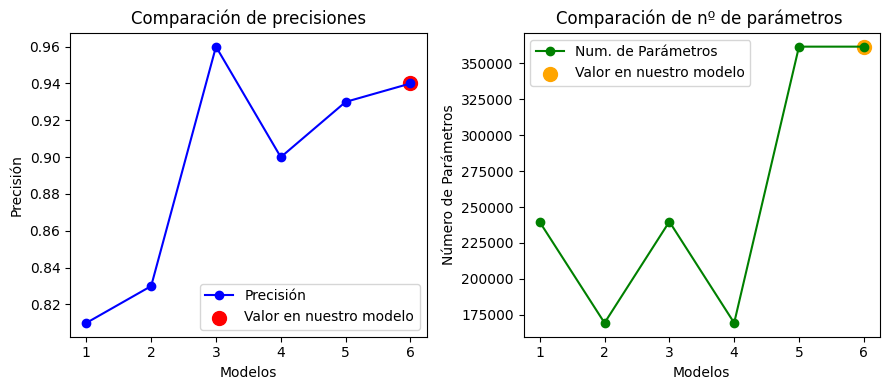

In [18]:
# Valores recogidos de precisión y nº de parámetros
precisiones = [0.81, 0.83, 0.96, 0.9, 0.93]
num_parametros = [239580, 169308, 239837, 169308, 361692]

fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# GRAFICO DE PRECISION
axs[0].plot(range(1, len(precisiones) + 2), precisiones + [0.94], color='blue', marker='o', label='Precisión')
axs[0].scatter([len(precisiones) + 1], [0.94], color='red', marker='o', label='Valor en nuestro modelo', s=100)
axs[0].set_xlabel('Modelos')
axs[0].set_ylabel('Precisión')
axs[0].set_title('Comparación de precisiones')
axs[0].legend()

# GRÁFICO DEL NÚMERO DE PARÁMETROS
axs[1].plot(range(1, len(num_parametros) + 2), num_parametros + [361692], color='green', marker='o', label='Num. de Parámetros')
axs[1].scatter([len(num_parametros) + 1], [361692], color='orange', marker='o', label='Valor en nuestro modelo', s=100)
axs[1].set_xlabel('Modelos')
axs[1].set_ylabel('Número de Parámetros')
axs[1].set_title('Comparación de nº de parámetros ')
axs[1].legend()

plt.tight_layout()
plt.show()


> # Reconocimiento y pre-preprocesamiento de las imagenes


Ahora vamos a crear una funcion llamada "sort contours" que la utilizaremos para obtener el orden correcto de los caracteres indiviuales de una palabra y así, extraer de forma correcta la salida. En este caso, necesitamos un ordenamiento de izquierda a derecha de los caracteres individuales.

La función "get letters" recupera la lista de letras y la función "get word" obtiene la palabra individual.

In [19]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [20]:
#!pip install imutils

In [21]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convertir la imagen a escala de grises
    ret, thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]

    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = image[y:y + h, x:x + w]  # Extraer la región de interés (ROI) de la imagen original
        roi = cv2.resize(roi, (64, 64), interpolation=cv2.INTER_CUBIC)  # Redimensionar la ROI a 64x64
        roi = roi.astype("float32") / 255.0  # Normalizar los valores de píxeles entre 0 y 1
        roi = np.expand_dims(roi, axis=0)  # Agregar una dimensión adicional para crear un lote de tamaño 1
        letters.append(roi)  # Agregar la ROI a la lista de letras

    return letters, image

In [22]:
def get_word(letters):
    word = ""
    for letter in letters:
        letrita = model.predict(letter)
        char_index = np.argmax(letrita, axis=1)[0]
        char = clases[char_index]
        word += char

    return word


Ahora voy a importar la base de datos de los nombres para hacer la segmentación de la imagen y ver si podemos detectar las letras de una palabra

In [23]:
api_token = {"username":"juliahernndezquintas","key":"a36e1c000b9dfca556f670ebce90a9f5"}

!rm -rf /root/.kaggle.
!mkdir /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
import json
with open('/root/.kaggle/kaggle.json','w') as file:
  json.dump(api_token,file)

# Descargamos nuestra base de datos:
!kaggle datasets download -d landlord/handwriting-recognition

mkdir: cannot create directory ‘/root/.kaggle’: File exists
handwriting-recognition.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
import zipfile

archivo_zip = '/content/handwriting-recognition.zip'

In [25]:
# Descomprimimos el archivo ZIP
archivo_zip = '/content/handwriting-recognition.zip'
extract_to_path = '/content/basededatos'

with zipfile.ZipFile(archivo_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

In [26]:
import cv2

# Cargar la imagen
image = cv2.imread("/content/basededatos/train_v2/train/TRAIN_00003.jpg")

# Obtener el tamaño de la imagen
altura, ancho, canales = image.shape

# Imprimir el tamaño de la imagen
print("Altura:", altura)
print("Ancho:", ancho)
print("Número de canales:", canales)


Altura: 44
Ancho: 324
Número de canales: 3


In [27]:
import imutils

letter, image = get_letters("/content/basededatos/train_v2/train/TRAIN_00003.jpg")


Vamos a comprobar que las imagenes son correctas y hemos seleccionado bien cada una de las letras

Número de letras: 5


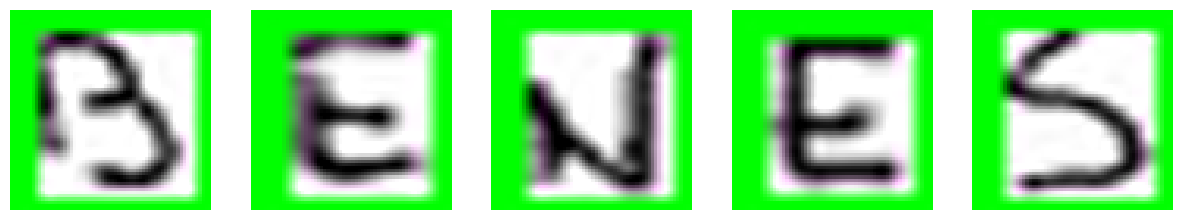

In [28]:
# Verificar la longitud de la lista de letras
print("Número de letras:", len(letter))

# Configurar el tamaño de la figura para mostrar todas las imágenes en una fila horizontal
plt.figure(figsize=(15, 3))

# Iterar sobre cada letra en la lista y mostrarla en su propio subplot
for i, img in enumerate(letter):
    # Seleccionar la i-ésima imagen del lote
    imagen = img[0]

    # Establecer el subplot actual
    plt.subplot(1, len(letter), i + 1)

    # Mostrar la imagen actual sin especificar el mapa de colores
    plt.imshow(imagen)

    # Ocultar los ejes si se desea
    plt.axis('off')

# Mostrar todas las imágenes en una fila horizontal
plt.show()


Ahora pasamos a la identificación del caracter

In [29]:
word = get_word(letter)
print(word)

1/1 [==============================] - 0s 18ms/step
zzzzz


Ahora lo imprimimos todo junto

zzzzz


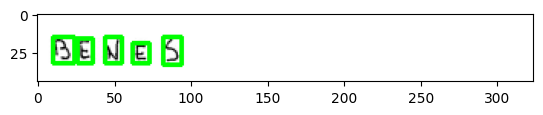

In [30]:
plt.imshow(image)
print(word)

SEGUNDA PRUEBA (especificar que cogemos imagenes especificas porque en algunas se selecciona texto que no nos interesa, podemos poner ejemplos)

1/1 [==============================] - 0s 19ms/step
5fzzzzz


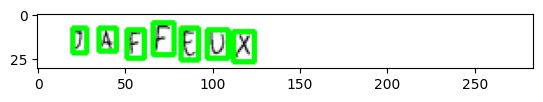

In [31]:
letter2, image2 = get_letters("/content/basededatos/train_v2/train/TRAIN_00030.jpg")
word2 = get_word(letter2)
print(word2)
plt.imshow(image2)

**Ahora pasamos a nuestras imagenes:**

Empezamos con una imagen de una palabra escrita en ipad, es decir, es una imagen nítida bien definida sin dificultades para que se detecten las letras

In [32]:
# pip install PyDrive oauth2client


In [33]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ls: cannot access '/content/drive/My Drive/': No such file or directory


In [34]:
import shutil

# Ruta del archivo en Google Drive
file_path = '/content/drive/MyDrive/mala_min.jpg'

# Ruta de destino para guardar el archivo descargado
destination_path = 'mala_min.jpg'

# Copiar el archivo desde Google Drive a la ruta de destino
shutil.copy(file_path, destination_path)

print("Archivo descargado con éxito.")


Archivo descargado con éxito.


1/1 [==============================] - 0s 27ms/step
NVb


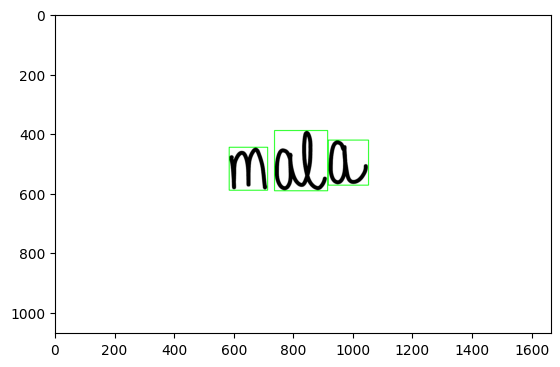

In [35]:
letter3, image3 = get_letters("/content/mala_min.jpg")
word3 = get_word(letter3)
print(word3)
plt.imshow(image3)

Ahora pasamos a la detección de un solo caracter escrito a mano en un folio y al cual se le ha tomado una foto (un caso menos idílico


In [36]:

# Ruta del archivo en Google Drive
ruta = '/content/drive/MyDrive/L.jpg'

# Ruta de destino para guardar el archivo descargado
destination_path = 'L.jpg'

# Copiar el archivo desde Google Drive a la ruta de destino
shutil.copy(ruta, destination_path)

print("Archivo descargado con éxito.")

Archivo descargado con éxito.


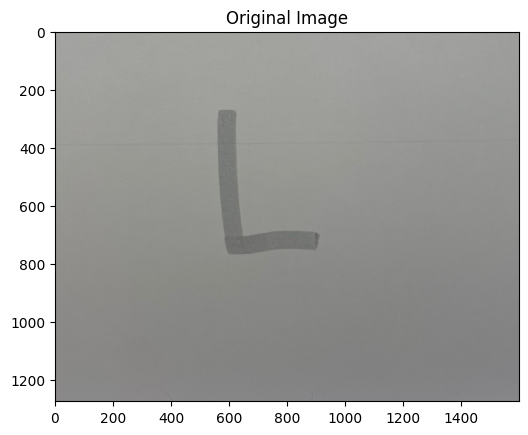

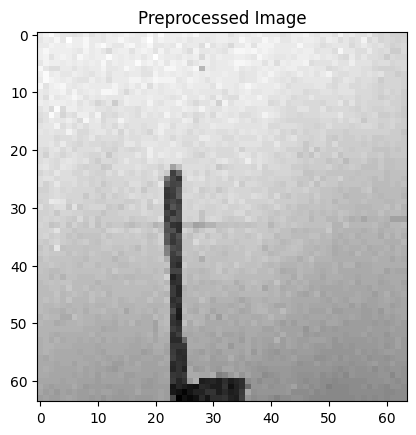

1/1 [==============================] - 0s 30ms/step
Predicción: N


In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

ultima_prediccion = None

def preprocess_image(direccion_imagen):
    # Leer la imagen utilizando OpenCV
    imagencita = cv2.imread(direccion_imagen)

    # Mostrar la imagen original
    plt.imshow(cv2.cvtColor(imagencita, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para mostrar con matplotlib
    plt.title('Original Image')
    plt.show()

    # Convertir a escala de grises si no lo está
    if len(imagencita.shape) > 2:
        image = cv2.cvtColor(imagencita, cv2.COLOR_BGR2GRAY)


    # Mejorar la segmentación con umbralización Otsu después de un ligero desenfoque
    blur = cv2.GaussianBlur(image, (5, 5), 0)
    _, thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Operaciones morfológicas para mejorar la estructura del carácter
    kernel = np.ones((3, 3), np.uint8)
    morph_image = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Aplicar un umbral adaptativo para binarizar la imagen
    _, binary_image = cv2.threshold(morph_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Encontrar contornos en la imagen binarizada
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Encontrar el contorno más grande (asumiendo que es la letra)
    if contours:
        cnt = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(cnt)

        # Recortar la región de interés (ROI) de la imagen original
        roi2 = image[y:y+h, x:x+w]

        # Redimensionar la ROI a un tamaño fijo
        desired_size = 64
        roi2 = cv2.resize(roi2, (desired_size, desired_size), interpolation=cv2.INTER_CUBIC)

        # Normalizar los valores de píxeles al rango [0, 1]
        roi2 = roi2.astype("float32") / 255.0


        return roi2
    else:
        raise RuntimeError('No se encontraron contornos en la imagen.')




preprocessed_image = preprocess_image('/content/L.jpg')

# Normalización y expansión de la dimensión
image = preprocessed_image / 255.0
image = np.expand_dims(image, axis=-1)

# Visualización de la imagen preprocesada
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Preprocessed Image')
plt.show()

# Predicción en la imagen preprocesada
# Expande la dimensión de la imagen para que tenga tres canales
image_rgb = np.repeat(image, 3, axis=-1)

# Predicción en la imagen preprocesada
prediction = model.predict(np.array([image_rgb]))


predicted_class_index = np.argmax(prediction)
predicted_class_name = clases[predicted_class_index]

# Almacenamos la predicción en la variable
ultima_prediccion = predicted_class_name

print(f'Predicción: {ultima_prediccion}')

#### ESTA ES LA DE CLASIFICACION

In [38]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



In [39]:
print(train_labels)
train_labels[0] # Crítica positiva


[1 0 0 ... 0 1 0]


1

In [40]:
# Ningún índice de palabras excederá las 10K palabras porque solo usamos las 10K
# más frecuentes
max([max(sequence) for sequence in train_data])


9999

In [41]:
# word_index es el diccionario que mapea cada palabra con un ínidice entero
word_index = imdb.get_word_index()
# print(word_index)
# Lo invertimos, asignando índices de enteros a palabras
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# print(reverse_word_index)
# Decodificamos la crítica. Los índices están desviados en 3, porque 0, 1 y 2
# están reservados para "relleno", "inicio de secuencia" y "desconocido"
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])



In [42]:
decoded_review


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [43]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Crea matriz de ceros con la forma (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # Pasa índices específicos de results[i] a 1s
    return results

# Datos de entrenamiento vectorizados
x_train = vectorize_sequences(train_data)
# Datos de prueba vectorizados
x_test = vectorize_sequences(test_data)


In [44]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [45]:
# Convertimos el vector de etiquetas en un tensor Numpy de coma flotante
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [46]:
from keras import models
from keras import layers

model = models.Sequential()
# Entrada, un tensor con la crítica vectorizada (10000 valores)
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [47]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [48]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 4s 90ms/step - loss: 0.5342 - acc: 0.7798 - val_loss: 0.4184 - val_acc: 0.8500
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3383 - acc: 0.8902 - val_loss: 0.3385 - val_acc: 0.8729
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2516 - acc: 0.9167 - val_loss: 0.3369 - val_acc: 0.8584
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2035 - acc: 0.9331 - val_loss: 0.2893 - val_acc: 0.8855
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1707 - acc: 0.9437 - val_loss: 0.2920 - val_acc: 0.8838
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1475 - acc: 0.9527 - val_loss: 0.2846 - val_acc: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1231 - acc: 0.9625 - val_loss: 0.2917 - val_acc: 0.8861
Epoch 8/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1063 - a

In [49]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['acc'])
print(history_dict['val_loss'])
print(history_dict['val_acc'])


[0.5342123508453369, 0.3383338451385498, 0.2516423761844635, 0.2035450041294098, 0.17068345844745636, 0.14747780561447144, 0.12312563508749008, 0.10632271319627762, 0.09267278760671616, 0.0787440612912178, 0.06912670284509659, 0.055810194462537766, 0.05120265483856201, 0.04021543636918068, 0.037200603634119034, 0.029173463582992554, 0.023719610646367073, 0.020194824784994125, 0.019699737429618835, 0.011172398924827576]
[0.7797999978065491, 0.8902000188827515, 0.9167333245277405, 0.9331333041191101, 0.9437333345413208, 0.9527333378791809, 0.9625333547592163, 0.9675999879837036, 0.9728666543960571, 0.9783333539962769, 0.9810666441917419, 0.9866666793823242, 0.9883333444595337, 0.9919999837875366, 0.9925333261489868, 0.9949333071708679, 0.9965333342552185, 0.9976666569709778, 0.996999979019165, 0.9994000196456909]
[0.4184475541114807, 0.3385361433029175, 0.3368839919567108, 0.28930750489234924, 0.2919860780239105, 0.28455257415771484, 0.291735976934433, 0.30385467410087585, 0.320439636707

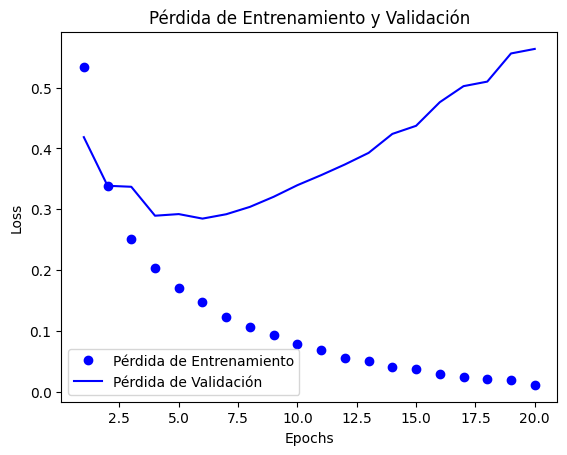

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


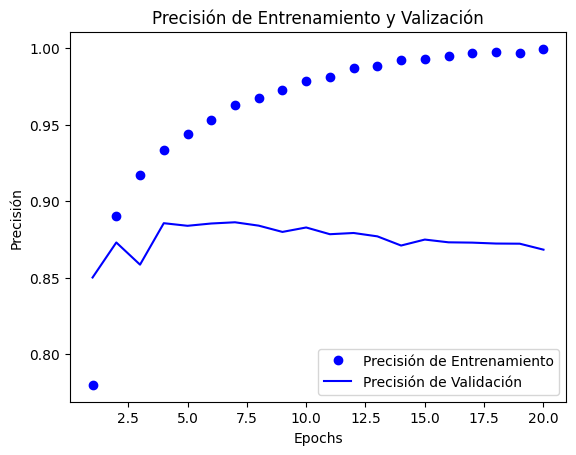

In [51]:
plt.clf()   # Limpia la figura
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

plt.show()



In [52]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)



Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.5048 - accuracy: 0.8140
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.3060 - accuracy: 0.8962
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2341 - accuracy: 0.9179
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2845 - accuracy: 0.8861


In [1]:
results

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Pérdida con los datos de test:", test_loss)
print("Precisión con los datos de test:", test_acc)


NameError: name 'results' is not defined

In [2]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# Carga el diccionario de índice de palabras
word_index = imdb.get_word_index()

# Convertir la frase a secuencias usando el índice de palabras
text = "this film was brilliant"
# Convertir el texto en minúsculas y dividir en palabras
words = text.lower().split()
# Convertir palabras a índices, ajustando índices como en el entrenamiento
sequences = [word_index.get(word, 2) + 3 for word in words]

# Realizar padding de la secuencia para que coincida con la entrada del modelo
data = pad_sequences([sequences], maxlen=10000)

# Predicción usando el modelo
prediction = model.predict(data)

# Visualizar la predicción
predicted_label = 'Positiva' if prediction[0] > 0.5 else 'Negativa'
print(f"Predicción de la frase: {predicted_label} (Score: {prediction[0]})")



NameError: name 'model' is not defined